# Clean data for bag of words

In [7]:
import csv
import json
import string
import re
from collections import Counter
from functools import reduce

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from pandas_ml import ConfusionMatrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [2]:
[redacted]

In [18]:
[redacted]

In [5]:
raw_data = get_raw_data()

In [ ]:
X, y = get_X_y(raw_data)

In [19]:
tabulate_data(raw_data)

                                        0     1      2
0                      Malicious Activity  3901  31.0%
1                  Trademark Infringement  5409  43.0%
2                      Child Exploitation    94   0.7%
3                                    SPAM  2300  18.3%
4                       Malicious Content   806   6.4%
5                         ISIS Propaganda    25   0.2%
6         Using Un-Allocated IP Addresses    11   0.1%
7  Vulnerability notification for domains    23   0.2%


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
del raw_data
del X, 
del y

NameError: name 'X' is not defined

# Find Features length + best initial algos

In [6]:
def run_spread(method, raw_data=None, max_=1000, min_=0, n=-100):
    x_axis = []
    y_axis = []
    conf_matrix = []
    for i in range(max_, min_, n):
        print(i)
        x_axis.append(i)
        print("GETTING RAW")
        if not raw_data:
            raw_data = get_raw_data()
        print("GETTING X y")
        X, y, labels = get_X_y(raw_data, max_features=i)
        print("SPLITTING")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
        del X
        del y
        print("PREDICTING")
        print(X_train.shape)
        y_pred = method(X_train, y_train, X_test)
        y_axis.append(acc(y_test, y_pred))
        conf_matrix.append(ConfusionMatrix(y_test, y_pred))
    clear_output()
    return x_axis, y_axis, conf_matrix, labels

### Gaussian Naive Bayes

This does not make a ton of sense, since the distribution of words is exponetial, not gaussian.

In [17]:
def gaussianNB(X_train, y_train, X_test):
    gnb = GaussianNB()
    with sklearn.config_context(assume_finite=True):
        return gnb.fit(X_train, y_train).predict(X_test)

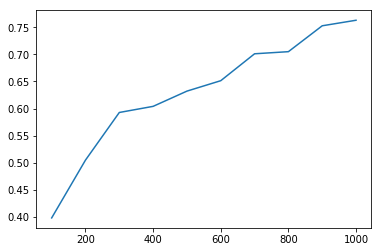

In [18]:
x, y, matrix, labels = run_spread(gaussianNB, raw_data)
plt.plot(x, y)

## SVC with RBF & polynomial kernals

Because of the small amount of key words for identifying we opt for the polynomical kernal.

In [19]:
def svc_rbf(X_train, y_train, X_test):
    clf = svm.SVC(kernel='rbf')  
    with sklearn.config_context(assume_finite=True):
        return clf.fit(X_train, y_train).predict(X_test)

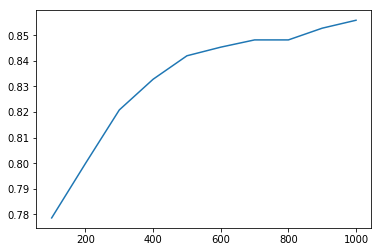

In [20]:
x, y, matrix, labels = run_spread(svc_rbf, raw_data)
plt.plot(x, y)

In [21]:
def svc_poly(X_train, y_train, X_test):
    clf = svm.SVC(kernel='poly')  
    with sklearn.config_context(assume_finite=True):
        return clf.fit(X_train, y_train).predict(X_test)

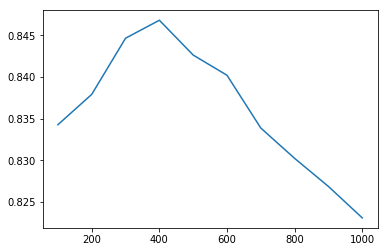

In [22]:
x, y, matrix, labels = run_spread(svc_poly, raw_data)
plt.plot(x, y)

## Decision trees

In [30]:
def tree(X_train, y_train, X_test):
    clf = DecisionTreeClassifier() 
    with sklearn.config_context(assume_finite=True):
        return clf.fit(X_train, y_train).predict(X_test)
 

def forest(X_train, y_train, X_test):
    clf =  RandomForestClassifier() 
    with sklearn.config_context(assume_finite=True):
        return clf.fit(X_train, y_train).predict(X_test)

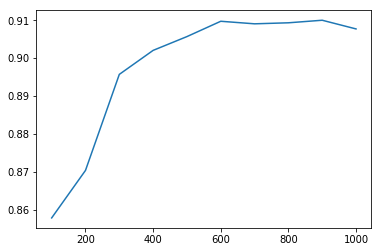

In [27]:
x, y, matrix, labels = run_spread(tree, raw_data)
plt.plot(x, y)

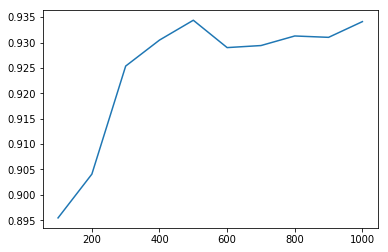

In [31]:
x, y, matrix, labels = run_spread(forest, raw_data)
plt.plot(x, y)

In [33]:
y

[0.93411479385610352,
 0.93101589867960122,
 0.93128536782538396,
 0.92939908380490432,
 0.9289948800862301,
 0.93438426300188626,
 0.93047696038803562,
 0.9253570466181622,
 0.90406898410132042,
 0.89544597143627058]

## Adaboost

In [34]:
def adaboost(X_train, y_train, X_test):
    clf = AdaBoostClassifier(n_estimators=100) 
    with sklearn.config_context(assume_finite=True):
        return clf.fit(X_train, y_train).predict(X_test)

([1000, 900, 800, 700, 600, 500, 400, 300, 200, 100], [0.56925357046618164, 0.56925357046618164, 0.54271085960657506, 0.53691727297224467, 0.74966316356777152, 0.61196443007275669, 0.58232282403664781, 0.70061977903530048, 0.61641067097817304, 0.51751549447588252], [Predicted               Child Exploitation  Malicious Activity  \
Actual                                                           
Child Exploitation                      21                   0   
Malicious Activity                       0                  69   
Malicious Content                        0                   1   
Other                                    3                 154   
SPAM                                    10                  14   
Trademark Infringement                   1                   0   
__all__                                 35                 238   

Predicted               Malicious Content  Other  SPAM  \
Actual                                                   
Child Exploitation    

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

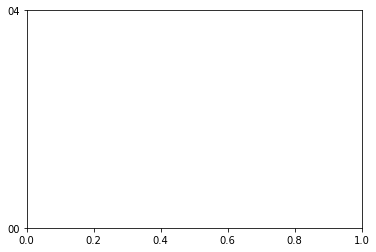

In [35]:
res = run_spread(adaboost, raw_data)
print(res)
plt.plot(*res)

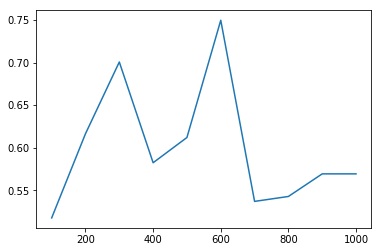

In [36]:
plt.plot(res[0], res[1])

## Nueral Net

In [15]:
def nn(X_train, y_train, X_test):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1) 
    with sklearn.config_context(assume_finite=True):
        return clf.fit(X_train, y_train).predict(X_test)

[1000, 900, 800, 700, 600, 500, 400, 300, 200, 100] [0.74130962004850443, 0.32551872810563193, 0.83279439504176767, 0.79655079493398007, 0.32497978981406628, 0.7274319590406898, 0.76933441120991641, 0.57181352735111834, 0.61829695499865267, 0.32551872810563193]


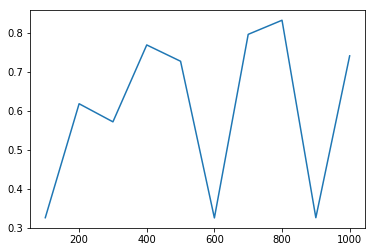

In [16]:
x, y, matrix, labels = run_spread(nn, raw_data)
print(x, y)
plt.plot(x, y)

In [172]:
matrix[5]

Predicted                               Child Exploitation  ISIS Propaganda  \
Actual                                                                        
Child Exploitation                                       3                0   
ISIS Propaganda                                          0                0   
Malicious Activity                                       0                0   
Malicious Content                                        0                0   
SPAM                                                     1                0   
Trademark Infringement                                   0                0   
Using Un-Allocated IP Addresses                          0                0   
Vulnerability notification for domains                   0                0   
__all__                                                  4                0   

Predicted                               Malicious Activity  Malicious Content  \
Actual                                           

## Analysis

Seems that a typical nueral net and decision tree perform the best.  We will use those algos to test n-grams.

Building model with random forest

In [19]:
X, y, labels = get_X_y(raw_data, max_features=500)
print("SPLITTING")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)
del X
del y
print("PREDICTING")
print(X_train.shape)

SPLITTING
PREDICTING
(7543, 500)


In [20]:
clf =  RandomForestClassifier() 
clf = CalibratedClassifierCV(clf)
with sklearn.config_context(assume_finite=True):
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [21]:
print(dir(clf))
index = 1
print(clf.predict_proba(X_test)[0])
print(clf.classes_)
print(y_test[0])

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_estimator_type', '_get_param_names', 'base_estimator', 'calibrated_classifiers_', 'classes_', 'cv', 'fit', 'get_params', 'method', 'predict', 'predict_proba', 'score', 'set_params']
[ 0.00211183  0.00485825  0.00373211  0.00105663  0.00224944  0.98599173]
['Child Exploitation' 'Malicious Activity' 'Malicious Content' 'Other'
 'SPAM' 'Trademark Infringement']
Trademark Infringement


In [22]:
acc(y_test, y_pred)

0.97792801749850866

In [25]:
print(dir(ConfusionMatrix(y_test, y_pred)))

['PRED_NAME', 'TRUE_NAME', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_avg_stat', '_classes', '_df_confusion', '_label', '_len', '_name_from_dict', '_str_dict', '_str_stats', '_y_pred', '_y_true', 'backend', 'binarize', 'classes', 'classification_report', 'display_sum', 'enlarge', 'get', 'is_binary', 'len', 'max', 'min', 'plot', 'population', 'pred', 'pred_name', 'print_stats', 'stats', 'stats_class', 'stats_overall', 'sum', 'title', 'to_array', 'to_dataframe', 'toarray', 'true', 'true_name', 'y_pred', 'y_true']


Predicted               Child Exploitation  Malicious Activity  \
Actual                                                           
Child Exploitation                      32                   0   
Malicious Activity                       0                 228   
Malicious Content                        0                   1   
Other                                    0                   2   
SPAM                                     0                   1   
Trademark Infringement                   0                   0   
__all__                                 32                 232   

Predicted               Malicious Content  Other  SPAM  \
Actual                                                   
Child Exploitation                      5      0     4   
Malicious Activity                      6      0    30   
Malicious Content                    1568      0    23   
Other                                   2     20     0   
SPAM                                    9      0   882   

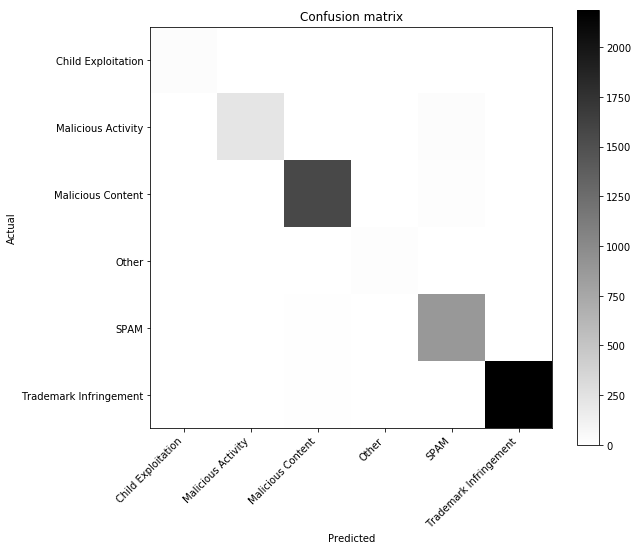

In [36]:
ConfusionMatrix(y_test, y_pred).plot()
ConfusionMatrix(y_test, y_pred)

Dump model for use in webapp.  Will adjust hyper parameters later.  Will also want to remove features that can color the prediction, i.e. numbers.

In [37]:
X = []
y = []
for i in raw_data:
    X.append(i['body'])
    y.append(i['type'])
vectorizer = CountVectorizer(max_features=500)
X = vectorizer.fit_transform(X)
labels = vectorizer.get_feature_names()
data = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

In [41]:
clf =  RandomForestClassifier() 
calib_clf = CalibratedClassifierCV(clf)
with sklearn.config_context(assume_finite=True):
    model = calib_clf.fit(X_train, y_train)
    
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump((vectorizer, model), f)
    
#with open('model.pkl', 'rb') as f:
#  vectorizer, clf = pickle.load(f)
#clf2.predict_proba(X_test[0].reshape(1, -1)),
#clf2.classes_

In [42]:
with open('lables.json', 'w') as f:
    f.write(json.dumps(labels))

Feature ranking:
1. feature 144 (0.074518)
2. feature 367 (0.064959)
3. feature 404 (0.051374)
4. feature 371 (0.051307)
5. feature 178 (0.047013)
6. feature 364 (0.041286)
7. feature 258 (0.038942)
8. feature 169 (0.035569)
9. feature 250 (0.029218)
10. feature 407 (0.029020)
11. feature 429 (0.020459)
12. feature 282 (0.019791)
13. feature 475 (0.015581)
14. feature 217 (0.014281)
15. feature 434 (0.012297)
16. feature 369 (0.010326)
17. feature 420 (0.009592)
18. feature 302 (0.009543)
19. feature 277 (0.009206)
20. feature 264 (0.008970)
21. feature 265 (0.008230)
22. feature 278 (0.007917)
23. feature 400 (0.007880)
24. feature 361 (0.007660)
25. feature 346 (0.007582)
26. feature 209 (0.007404)
27. feature 482 (0.007404)
28. feature 288 (0.006824)
29. feature 317 (0.006808)
30. feature 362 (0.006541)
31. feature 385 (0.006386)
32. feature 253 (0.006373)
33. feature 294 (0.006260)
34. feature 314 (0.005679)
35. feature 308 (0.005627)
36. feature 0 (0.005498)
37. feature 468 (0.005

356. feature 240 (0.000156)
357. feature 181 (0.000154)
358. feature 109 (0.000154)
359. feature 129 (0.000151)
360. feature 485 (0.000150)
361. feature 132 (0.000150)
362. feature 188 (0.000149)
363. feature 497 (0.000148)
364. feature 151 (0.000148)
365. feature 472 (0.000144)
366. feature 54 (0.000143)
367. feature 18 (0.000141)
368. feature 34 (0.000138)
369. feature 119 (0.000138)
370. feature 106 (0.000135)
371. feature 223 (0.000132)
372. feature 83 (0.000130)
373. feature 487 (0.000129)
374. feature 92 (0.000125)
375. feature 388 (0.000122)
376. feature 80 (0.000122)
377. feature 68 (0.000120)
378. feature 447 (0.000119)
379. feature 458 (0.000118)
380. feature 81 (0.000118)
381. feature 227 (0.000118)
382. feature 301 (0.000116)
383. feature 12 (0.000116)
384. feature 354 (0.000115)
385. feature 105 (0.000115)
386. feature 384 (0.000113)
387. feature 270 (0.000111)
388. feature 122 (0.000110)
389. feature 448 (0.000108)
390. feature 147 (0.000108)
391. feature 406 (0.000106)
3

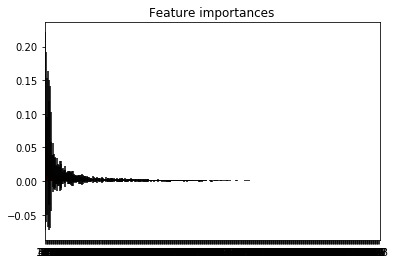

In [54]:
clf = RandomForestClassifier() 
with sklearn.config_context(assume_finite=True):
    model = clf.fit(X_train, y_train)

    
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [61]:
labels[178]

'belief'